In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [232]:
df = pd.read_csv("D3.csv", header=None)

# Getting each input variable from the columns
X1 = np.array(df.values[:,0])
X2 = np.array(df.values[:,1])
X3 = np.array(df.values[:,2])

# Getting the output variable from the last column
y = np.array(df.values[:,3])

m = len(y) # Training samples

In [233]:
def calculate_cost(X,y,theta):
    """Computes the cost function for linear regression"""
    
    h = X.dot(theta)
    errors = np.subtract(h,y)
    sqrErrors = np.square(errors)
    J = 1/(2*m) * np.sum(sqrErrors)
    return J

# The gradient descent works with any number of input variables
def gradient_descent(X,y,theta,alpha,iterations):
    """Computes the gradient descent for linear regression"""
    
    cost_history = np.zeros(iterations,)
    theta_history = np.zeros([iterations, theta.size])

    for i in range(iterations):
        h = X.dot(theta)
        errors = np.subtract(h,y)
        sum_delta = (alpha/m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history[i] = calculate_cost(X,y,theta)
        
        theta_history[i] = theta
    
    return cost_history, theta, theta_history

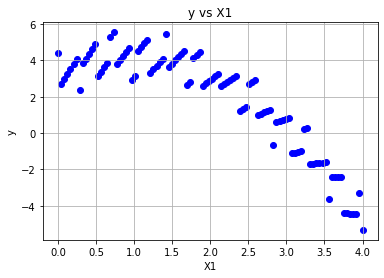

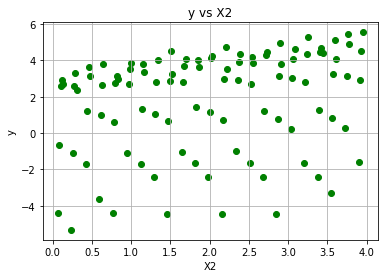

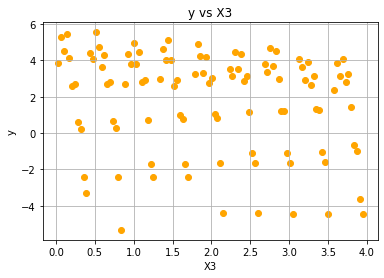

In [226]:
#Problem 1
# Plotting the inputs vs output
plt.figure()
plt.scatter(X1, y,  color='blue') 
plt.xlabel("X1")
plt.ylabel("y")
plt.title("y vs X1")
plt.grid()

plt.figure()
plt.scatter(X2, y,  color='green') 
plt.xlabel("X2")
plt.ylabel("y")
plt.title("y vs X2")
plt.grid()

plt.figure()
plt.scatter(X3, y,  color='orange') 
plt.xlabel("X3")
plt.ylabel("y")
plt.title("y vs X3")
plt.grid()

In [227]:
# Calculating linear regression model for X1, X2, X3 seperately
# Matrix with a single column of ones
X0 = np.ones((m,1))

# Reshaping X1, X2, and X3 to be a 2-D Array
X1=X1.reshape(m,1)
X2=X2.reshape(m,1)
X3=X3.reshape(m,1)

# Combining X0 with X1, X2, and X3 seperately to stack them horizontally
X1=np.hstack((X0,X1))
X2=np.hstack((X0,X2))
X3=np.hstack((X0,X3))


In [228]:
theta = np.zeros(2) # Theta_0 and theta_1

# Computing the inital cost for X1, X2, and X3
cost1 = calculate_cost(X1,y,theta)
print("The cost for X1: ", cost1)
cost2 = calculate_cost(X2,y,theta)
print("The cost for X2: ", cost2)
cost3 = calculate_cost(X3,y,theta)
print("The cost for X3: ", cost3)

The cost for X1:  5.524438459185473
The cost for X2:  5.524438459185473
The cost for X3:  5.524438459185473


In [230]:
# Computing the gradient descent for X1, X2, and X3 seperately
alpha = .02
iterations = 600

cost1_history, theta1, theta1_history = gradient_descent(X1,y,theta,alpha,iterations)
print("Theta values for X1: ", theta1)

alpha = .01
iterations = 40
cost2_history, theta2, theta2_history = gradient_descent(X2,y,theta,alpha,iterations)
print("Theta values for X2: ", theta2)

alpha = .02
iterations = 600
cost3_history, theta3, theta3_history = gradient_descent(X3,y,theta,alpha,iterations)
print("Theta values for X3: ", theta3)

Theta values for X1:  [ 5.52168752 -1.88021764]
Theta values for X2:  [0.3009449  0.65999096]
Theta values for X3:  [ 2.69330966 -0.45004043]


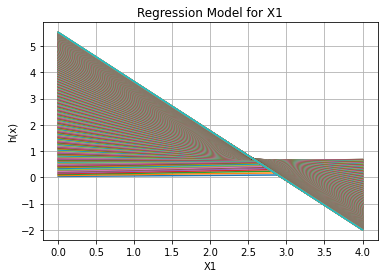

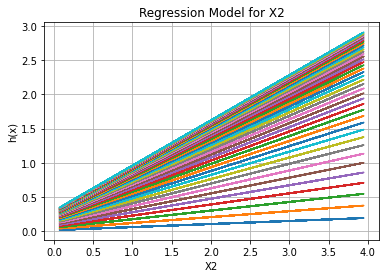

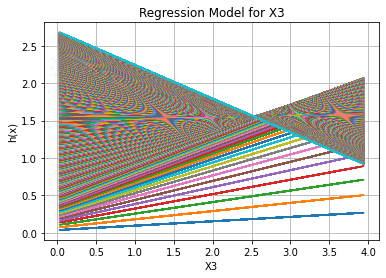

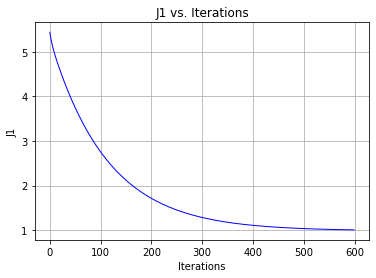

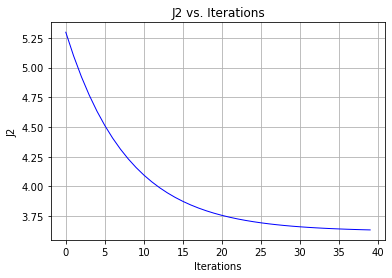

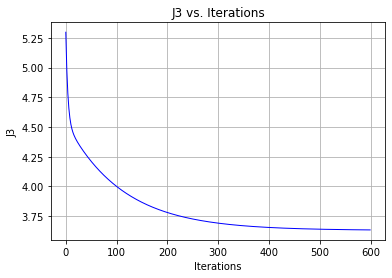

In [222]:

# Plotting the model for X1 in each iterion
plt.figure()

for t in theta1_history:
    plt.plot(X1[:,1],X1.dot(t))

plt.xlabel("X1")
plt.ylabel("h(x)")
plt.title("Regression Model for X1")
plt.grid()

# Plotting the model for X2 in each iterion
plt.figure()

for t in theta2_history:
    plt.plot(X2[:,1],X2.dot(t))

plt.xlabel("X2")
plt.ylabel("h(x)")
plt.title("Regression Model for X2")
plt.grid()

# Plotting the model for X3 in each iterion
plt.figure()

for t in theta3_history:
    plt.plot(X3[:,1],X3.dot(t))

plt.xlabel("X3")
plt.ylabel("h(x)")
plt.title("Regression Model for X3")
plt.grid()


# Plotting the cost historty vs the number of iterations
plt.figure()
plt.plot(cost1_history[0:len(cost1_history)], color='blue', linewidth=1)
plt.xlabel("Iterations")
plt.ylabel("J1")
plt.title("J1 vs. Iterations")
plt.grid()

plt.figure()
plt.plot(cost2_history[0:len(cost2_history)], color='blue', linewidth=1)
plt.xlabel("Iterations")
plt.ylabel("J2")
plt.title("J2 vs. Iterations")
plt.grid()

plt.figure()
plt.plot(cost3_history[0:len(cost3_history)], color='blue', linewidth=1)
plt.xlabel("Iterations")
plt.ylabel("J3")
plt.title("J3 vs. Iterations")
plt.grid()

In [234]:
# Problem 2
# Calculating linear regression model for X1, X2, X3 seperately
# Matrix with a single column of ones
X0 = np.ones((m,1))

# Reshaping X1, X2, and X3 to be a 2-D Array
X1=X1.reshape(m,1)
X2=X2.reshape(m,1)
X3=X3.reshape(m,1)

# Combining X0 with X1, X2, and X3 to stack them horizontally
X = np.hstack((X0,X1,X2,X3))

# Calculating the intial cost
theta = np.zeros(4) # Theta_0 and theta_1
cost = calculate_cost(X,y,theta)

In [235]:
# Calculating the gradient descent
alpha = .1
iterations = 100

cost_history, theta, theta_history = gradient_descent(X,y,theta,alpha,iterations)
print("Theta values for X: ", theta)

Theta values for X:  [ 3.40790315 -1.73442481  0.84756123  0.01381493]


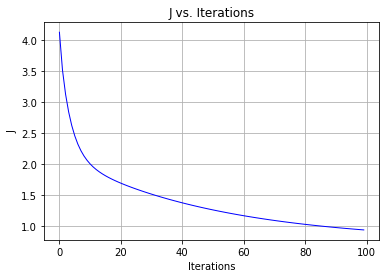

In [236]:
# Plotting the Cost vs Iterations
plt.figure()
plt.plot(cost_history[0:len(cost_history)], color='blue', linewidth=1)
plt.xlabel("Iterations")
plt.ylabel("J")
plt.title("J vs. Iterations")
plt.grid()

In [237]:
def predict(X, theta):
    return theta[0] + theta[1]*X[0] + theta[2]*X[1] + theta[3]*X[2]

In [238]:
# Predicting for the new values

# new_X = (1,1,1)
new_X = np.array([1,1,1])
y_pred = predict(new_X, theta)
print(y_pred)

# new_X = (2,0,4)
new_X = np.array([2,0,4])
y_pred = predict(new_X, theta)

print(y_pred)

# new_X = (3,2,1)
new_X = np.array([3,2,1])
y_pred = predict(new_X, theta)

print(y_pred)

2.5348545081899188
-0.00568672460181445
-0.08643387413829286
